In [1]:
import pandas as pd
import seaborn as sns

In [6]:
data=pd.read_csv('Udemy_Courses.csv', parse_dates=['published_timestamp'])

In [7]:
data.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

# 1. Display Top 10 Rows of The Dataset


In [8]:
data.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments


# 2. Check Last 5 Rows of The Dataset



In [9]:
data.tail(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26 16:45:55+00:00,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26 22:19:48+00:00,Graphic Design


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)



In [10]:
data.shape

(3682, 11)

# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 291.4+ KB


# 5. Check Null Values In The Dataset


In [14]:
data.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

# 6. Check For Duplicate Data and Drop Them


In [18]:
dup=data.duplicated().any()
print('Are they dup values?',dup)

Are they dup values? True


In [20]:
data=data.drop_duplicates()

# 7. Find Out Number of Courses Per Subjects


In [16]:
data.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [17]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments


In [23]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [26]:
import matplotlib.pyplot as plt

C:\Users\Gwen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


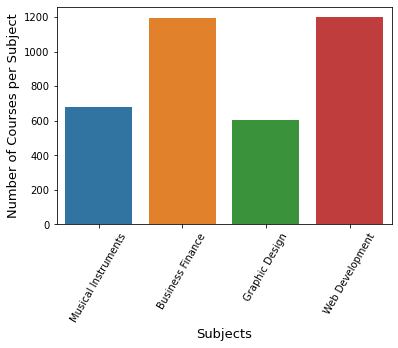

In [29]:
sns.countplot(data['subject'])
plt.xlabel('Subjects', fontsize=13)
plt.ylabel('Number of Courses per Subject', fontsize=13)
plt.xticks(rotation=60)
plt.show()

# 8. For Which Levels, Udemy Courses Providing The Courses


In [30]:
data.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [32]:
data['level'].value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

# 9. Display The Count of Paid and Free Courses 


In [35]:
data['is_paid'].value_counts()

True     3366
False     310
Name: is_paid, dtype: int64

C:\Users\Gwen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


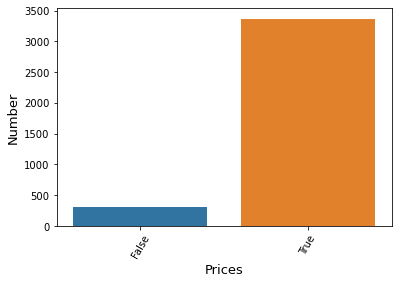

In [36]:
sns.countplot(data['is_paid'])
plt.xlabel('Prices', fontsize=13)
plt.ylabel('Number', fontsize=13)
plt.xticks(rotation=60)
plt.show()

# 10. Which Course Has More Lectures (Free or Paid)?


In [40]:
(data.groupby(['is_paid']).mean())['num_lectures']

is_paid
False    21.416129
True     41.816993
Name: num_lectures, dtype: float64

# 11. Which Courses Have A Higher Number of Subscribers Free or Paid?


<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

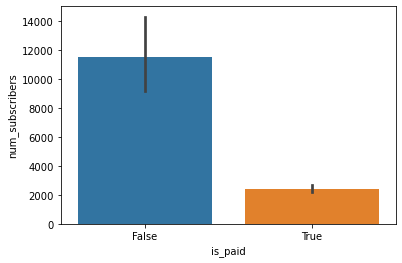

In [43]:
sns.barplot(x='is_paid',y='num_subscribers',data=data)

# 12. Which Level Has The Highest Number of Subscribers?


<AxesSubplot:xlabel='level', ylabel='num_subscribers'>

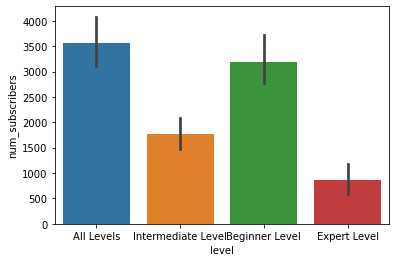

In [44]:
sns.barplot(x='level',y='num_subscribers',data=data)

# 13. Find Most Popular Course Title


In [48]:
data[data['num_subscribers'].max()==data['num_subscribers']]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development


# 14. Display 10 Most Popular Courses As Per Number of Subscribers


In [49]:
data[data['num_subscribers']['subject']]

KeyError: 'subject'

# 15. Find The Course Which Is Having The Highest Number of Reviews.


# 16. Does Price Affect the Number of Reviews?


# 17. Find Total Number of Courses Related To Python


# 18. Display 10 Most Popular Python Courses As Per Number of Subscribers


# 19. In Which Year The Highest Number of Courses Were Posted?


# 20. Display Category-Wise Count of Posted Subjects [Year Wise] 